In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd


male_players = pd.read_csv('/content/drive/My Drive/Dissertation_Datasets/male_players.csv')
male_teams = pd.read_csv('/content/drive/My Drive/Dissertation_Datasets/male_teams.csv')

# Verify loading by displaying the first few rows of each dataset
print("Male Players:")
print(male_players.head())

print("\n Male Teams:")
print(male_teams.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-8be9caf80ec2>:9: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  male_players = pd.read_csv('/content/drive/My Drive/Dissertation_Datasets/male_players.csv')


Male Players:
   player_id                             player_url  fifa_version  \
0     231747    /player/231747/kylian-mbappe/240002          24.0   
1     239085   /player/239085/erling-haaland/240002          24.0   
2     192985  /player/192985/kevin-de-bruyne/240002          24.0   
3     158023     /player/158023/lionel-messi/240002          24.0   
4     165153    /player/165153/karim-benzema/240002          24.0   

   fifa_update update_as_of    short_name                       long_name  \
0          2.0   2023-09-22     K. Mbappé            Kylian Mbappé Lottin   
1          2.0   2023-09-22    E. Haaland            Erling Braut Haaland   
2          2.0   2023-09-22  K. De Bruyne                 Kevin De Bruyne   
3          2.0   2023-09-22      L. Messi  Lionel Andrés Messi Cuccittini   
4          2.0   2023-09-22    K. Benzema                   Karim Benzema   

  player_positions  overall  potential  ...   ldm   cdm   rdm   rwb    lb  \
0           ST, LW       91    

In [ ]:
# Function to print column names of each DataFrame
def print_column_names(df, name):
    print(f"\n{name} Columns:")
    print(df.columns.tolist())

# Print column names for each dataset
print_column_names(male_players, "Male Players")
print_column_names(male_teams, "Male Teams")


Male Players Columns:
['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 

In [ ]:
import pandas as pd

# Dictionary to store the data information
data_info = {}

# Function to summarize each DataFrame
def summarize_dataframe(df, name):
    info = {
        "Column Names": df.columns.tolist(),
        "Data Types": df.dtypes.to_dict(),
        "Sample Data": df.head(3).to_dict(orient="records")
    }
    data_info[name] = info

# Summarize each dataset
summarize_dataframe(male_players, "Male Players")
summarize_dataframe(male_teams, "Male Teams")


# Display data information in a structured format
for name, info in data_info.items():
    print(f"\nDataset: {name}")
    print("Column Names:", info["Column Names"])
    print("Data Types:", info["Data Types"])
    print("Sample Data:", info["Sample Data"])


Dataset: Male Players
Column Names: ['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_a

In [ ]:
import pandas as pd



# Check for missing values in Male Players dataset
male_players_missing = male_players.isnull().sum().sort_values(ascending=False)
print("Male Players Missing Values:")
print(male_players_missing[male_players_missing > 0])

# Identify non-essential columns
non_essential_columns = [
    'nation_jersey_number', 'nation_team_id', 'nation_position',
    'club_loaned_from', 'player_tags', 'player_traits',
    'goalkeeping_speed', 'release_clause_eur', 'club_joined_date',
    'club_contract_valid_until_year', 'club_jersey_number', 'club_position'
]

# Create a separate DataFrame for the columns to preserve them
extra_data = male_players[non_essential_columns]

# Drop the columns from the main DataFrame for now
main_data = male_players.drop(columns=non_essential_columns)

# Fill missing values in the main data
numerical_cols_main = main_data.select_dtypes(include=['float64', 'int64']).columns
main_data[numerical_cols_main] = main_data[numerical_cols_main].fillna(main_data[numerical_cols_main].median())

categorical_cols_main = main_data.select_dtypes(include=['object']).columns
main_data[categorical_cols_main] = main_data[categorical_cols_main].fillna('Unknown')

# Verify no missing values remain in the main data
print("\nRemaining Missing Values in Main Data:")
print(main_data.isnull().sum().sum())


# Merge main_data and extra_data back together
cleaned_male_players = pd.concat([main_data, extra_data], axis=1)

# Verify the shape and check for any remaining missing values
print("Shape of Cleaned Male Players Data:")
print(cleaned_male_players.shape)

print("\nRemaining Missing Values in Cleaned Male Players Data:")
print(cleaned_male_players.isnull().sum().sum())



# Identify non-essential columns
non_essential_team_columns = [
    'rival_team', 'home_stadium', 'coach_id'
]

# Separate non-essential data
extra_teams_data = male_teams[non_essential_team_columns]

# Drop these columns from the main teams dataset
main_teams_data = male_teams.drop(columns=non_essential_team_columns)

# Fill missing values in the main teams dataset
numerical_cols_teams = main_teams_data.select_dtypes(include=['float64', 'int64']).columns
main_teams_data[numerical_cols_teams] = main_teams_data[numerical_cols_teams].fillna(main_teams_data[numerical_cols_teams].median())

categorical_cols_teams = main_teams_data.select_dtypes(include=['object']).columns
main_teams_data[categorical_cols_teams] = main_teams_data[categorical_cols_teams].fillna('Unknown')

# Merge back main_teams_data and extra_teams_data
cleaned_male_teams = pd.concat([main_teams_data, extra_teams_data], axis=1)

# Verify the shape and check for missing values
print("Shape of Cleaned Male Teams Data:")
print(cleaned_male_teams.shape)

print("\nRemaining Missing Values in Cleaned Male Teams Data:")
print(cleaned_male_teams.isnull().sum().sum())


Male Players Missing Values:
nation_jersey_number              169923
nation_position                   169923
nation_team_id                    169923
club_loaned_from                  169298
player_tags                       166103
goalkeeping_speed                 159997
player_traits                      98216
release_clause_eur                 59299
mentality_composure                32888
shooting                           20024
passing                            20024
dribbling                          20024
defending                          20024
physic                             20024
pace                               20024
club_joined_date                   12588
league_level                        2250
value_eur                           2153
club_team_id                        1865
club_name                           1865
league_id                           1865
league_name                         1865
club_position                       1865
club_jersey_number          

In [ ]:
# Perform an inner join on club_team_id (male_players) and team_id (male_teams)
merged_data = pd.merge(
    cleaned_male_players,
    cleaned_male_teams,
    how='inner',
    left_on='club_team_id',
    right_on='team_id'
)

# Check the resulting dataset
print("Shape of Merged Data:")
print(merged_data.shape)

print("\nSample of Merged Data:")
print(merged_data.head())

# Check for missing values in the merged dataset
print("\nMissing Values in Merged Data:")
print(merged_data.isnull().sum().sum())


Shape of Merged Data:
(1425101, 163)

Sample of Merged Data:
   player_id                           player_url  fifa_version_x  \
0     231747  /player/231747/kylian-mbappe/240002            24.0   
1     231747  /player/231747/kylian-mbappe/240002            24.0   
2     231747  /player/231747/kylian-mbappe/240002            24.0   
3     231747  /player/231747/kylian-mbappe/240002            24.0   
4     231747  /player/231747/kylian-mbappe/240002            24.0   

   fifa_update_x update_as_of_x short_name             long_name  \
0            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   
1            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   
2            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   
3            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   
4            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   

  player_positions  overall_x  potential  ...  build_up_play_dribbling  \
0           ST, LW         91         94 

**Aggregate Performance Metrics**


In [ ]:
# Ensure 'fifa_version' exists in merged_data
if 'fifa_version_x' not in merged_data.columns:
    print("Error: 'fifa_version_x' column not found in merged_data.")
else:
    import numpy as np

    # Define mapping for FIFA version to corresponding year
    fifa_version_to_year = {
        15: 2014, 16: 2015, 17: 2016, 18: 2017, 19: 2018,
        20: 2019, 21: 2020, 22: 2021, 23: 2022, 24: 2023
    }

    # Map fifa_version to current year
    merged_data['current_year'] = merged_data['fifa_version_x'].map(fifa_version_to_year)

    # Aggregate performance metrics
    merged_data['attacking'] = merged_data['attacking_finishing'] + merged_data['attacking_short_passing'] + merged_data['attacking_crossing']
    merged_data['movement'] = merged_data['movement_sprint_speed'] + merged_data['movement_acceleration'] + merged_data['movement_balance']
    merged_data['defending'] = merged_data['defending_marking_awareness'] + merged_data['defending_standing_tackle'] + merged_data['mentality_interceptions']
    merged_data['power'] = merged_data['power_shot_power'] + merged_data['power_stamina'] + merged_data['power_strength']

    # Calculate growth and development potential
    merged_data['growth_rate'] = (merged_data['potential'] - merged_data['overall_x']) / merged_data['age']

    # Calculate contract years left
    merged_data['contract_years_left'] = merged_data['club_contract_valid_until_year'] - merged_data['current_year']

    # Age-relative potential
    merged_data['age_relative_potential'] = merged_data.apply(
        lambda row: (row['potential'] - row['overall_x']) / (30 - row['age']) if row['age'] < 30 else 0, axis=1
    )

    # Normalize monetary values
    team_avg_value = merged_data.groupby('club_team_id')['value_eur'].transform('mean')
    merged_data['normalized_value'] = merged_data['value_eur'] / team_avg_value

    # BMI
    merged_data['bmi'] = merged_data['weight_kg'] / (merged_data['height_cm'] / 100) ** 2

    # Team-level features
    team_avg_overall = merged_data.groupby('club_team_id')['overall_x'].transform('mean')
    merged_data['team_avg_overall'] = team_avg_overall

    # Encode nationality by continent (e.g., Europe = 1, others = 0)
    european_nations = ['England', 'France', 'Germany', 'Italy', 'Spain']
    merged_data['is_european'] = merged_data['nationality_name_x'].apply(lambda x: 1 if x in european_nations else 0)

    # Percentile in Position
    positions = merged_data['player_positions'].unique()
    for pos in positions:
        pos_filter = merged_data['player_positions'] == pos
        merged_data.loc[pos_filter, 'overall_percentile_in_position'] = merged_data.loc[pos_filter, 'overall_x'].rank(pct=True) * 100
        merged_data.loc[pos_filter, 'potential_percentile_in_position'] = merged_data.loc[pos_filter, 'potential'].rank(pct=True) * 100

    # Verify results
    print(merged_data[['current_year', 'attacking', 'movement', 'defending', 'power', 'growth_rate', 'contract_years_left',
                       'age_relative_potential', 'normalized_value', 'bmi', 'team_avg_overall', 'is_european',
                       'overall_percentile_in_position', 'potential_percentile_in_position']].head())




   current_year  attacking  movement  defending  power  growth_rate  \
0          2023        258       276         98    255        0.125   
1          2023        258       276         98    255        0.125   
2          2023        258       276         98    255        0.125   
3          2023        258       276         98    255        0.125   
4          2023        258       276         98    255        0.125   

   contract_years_left  age_relative_potential  normalized_value        bmi  \
0                  1.0                     0.5          7.279561  22.642193   
1                  1.0                     0.5          7.279561  22.642193   
2                  1.0                     0.5          7.279561  22.642193   
3                  1.0                     0.5          7.279561  22.642193   
4                  1.0                     0.5          7.279561  22.642193   

   team_avg_overall  is_european  overall_percentile_in_position  \
0         77.638514           

In [ ]:
# Display all column names and their data types
print("Column Names and Data Types in merged_data:")
print(merged_data.dtypes)

# Optionally, separate columns by type for easier analysis
categorical_columns = merged_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("\nCategorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Column Names and Data Types in merged_data:
player_id                             int64
player_url                           object
fifa_version_x                      float64
fifa_update_x                       float64
update_as_of_x                       object
                                     ...   
bmi                                 float64
team_avg_overall                    float64
is_european                           int64
overall_percentile_in_position      float64
potential_percentile_in_position    float64
Length: 176, dtype: object

Categorical Columns:
['player_url', 'update_as_of_x', 'short_name', 'long_name', 'player_positions', 'dob', 'club_name', 'league_name_x', 'nationality_name_x', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'nation_position', 'club_loaned_from', 'player_tags',

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Columns for Label Encoding
label_encode_cols = ['player_positions', 'club_name', 'league_name_x', 'nationality_name_x', 'club_position']

# Apply Label Encoding
for col in label_encode_cols:
    if col in merged_data.columns:
        merged_data[col] = label_encoder.fit_transform(merged_data[col])
    else:
        print(f"Column '{col}' not found in merged_data. Skipping Label Encoding.")

# Columns for One-Hot Encoding
one_hot_encode_cols = ['preferred_foot', 'work_rate', 'real_face', 'def_style', 'off_style', 'build_up_play_positioning', 'chance_creation_positioning']

# Verify columns before One-Hot Encoding
missing_cols = [col for col in one_hot_encode_cols if col not in merged_data.columns]
if missing_cols:
    print(f"The following columns are missing and will be skipped for One-Hot Encoding: {missing_cols}")

# Apply One-Hot Encoding for available columns
merged_data = pd.get_dummies(merged_data, columns=[col for col in one_hot_encode_cols if col in merged_data.columns], drop_first=True)

# Verify Encoded Data
print("Encoded Data Sample:")
print(merged_data.head())


# Check for encoded columns
encoded_columns = [col for col in merged_data.columns if col.startswith(('preferred_foot_', 'work_rate_', 'real_face_',
                                                                         'def_style_', 'off_style_',
                                                                         'build_up_play_positioning_',
                                                                         'chance_creation_positioning_'))]

print("Encoded columns:")
print(encoded_columns)



# Detailed overview of merged_data
merged_data.info()




Encoded Data Sample:
   player_id                           player_url  fifa_version_x  \
0     231747  /player/231747/kylian-mbappe/240002            24.0   
1     231747  /player/231747/kylian-mbappe/240002            24.0   
2     231747  /player/231747/kylian-mbappe/240002            24.0   
3     231747  /player/231747/kylian-mbappe/240002            24.0   
4     231747  /player/231747/kylian-mbappe/240002            24.0   

   fifa_update_x update_as_of_x short_name             long_name  \
0            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   
1            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   
2            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   
3            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   
4            2.0     2023-09-22  K. Mbappé  Kylian Mbappé Lottin   

   player_positions  overall_x  potential  ...  \
0              1967         91         94  ...   
1              1967         91         94  ...   
2    

In [ ]:


# List of columns to check
columns_to_check = ['preferred_foot_Right', 'work_rate', 'real_face', 'def_style', 'off_style', 'build_up_play_positioning', 'chance_creation_positioning']

# Check if these columns exist in merged_data
for col in columns_to_check:
    if col in merged_data.columns:
        print(f"Column '{col}' exists in merged_data.")
    else:
        print(f"Column '{col}' is missing in merged_data.")


Column 'preferred_foot_Right' exists in merged_data.
Column 'work_rate' is missing in merged_data.
Column 'real_face' is missing in merged_data.
Column 'def_style' is missing in merged_data.
Column 'off_style' is missing in merged_data.
Column 'build_up_play_positioning' is missing in merged_data.
Column 'chance_creation_positioning' is missing in merged_data.


In [ ]:
# Check if a specific column exists in a DataFrame
if 'preferred_foot' in male_players.columns:
    print("Column 'preferred_foot' exists in male_players.")
else:
    print("Column 'preferred_foot' does not exist in male_players.")

if 'preferred_foot' in male_teams.columns:
    print("Column 'preferred_foot' exists in male_teams.")
else:
    print("Column 'preferred_foot' does not exist in male_teams.")


Column 'preferred_foot' exists in male_players.
Column 'preferred_foot' does not exist in male_teams.


In [ ]:
# Get Unique League Names
unique_leagues = merged_data['league_name_x'].unique()

# Display All League Names
print("Unique League Names in the Dataset:")
print(unique_leagues)


Unique League Names in the Dataset:
[26 31 28 35 15  6 36 39 23 13 10 41 16  7 25 32  2 38 11 37  1 40 20 24
 29 33  9 34  5 14  8 27  4 21  0 19 17  3 18 30 42 22 12]


In [ ]:
# Re-initialize the label encoder
label_encoder = LabelEncoder()

# Fit the encoder with the original league names (before encoding)
label_encoder.fit(male_players['league_name'])  # Replace with original column containing league names

# Retrieve the mapping
league_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Display the mapping
print("Mapping of Encoded Numbers to League Names:")
for key, value in league_mapping.items():
    print(f"{key}: {value}")


Mapping of Encoded Numbers to League Names:
0: 1. Division
1: 1. HNL
2: 2. Bundesliga
3: 3. Liga
4: A-League
5: Allsvenskan
6: Bundesliga
7: Championship
8: Ekstraklasa
9: Eliteserien
10: Eredivisie
11: Fortuna Liga
12: J-League
13: Jupiler Pro League
14: K League 1
15: La Liga
16: La Liga 2
17: League One
18: League Two
19: Liga 1
20: Liga BetPlay
21: Liga De Futbol Prof
22: Liga MX
23: Liga Portugal
24: Liga Pro
25: Liga Profesional
26: Ligue 1
27: Ligue 2
28: Major League Soccer
29: NB I.
30: Premier Division
31: Premier League
32: Premiership
33: Primera Division
34: Primera División
35: Pro League
36: Serie A
37: Serie B
38: Super League
39: Super Lig
40: Superliga
41: Veikkausliiga
42: nan


In [ ]:
# List of leagues to include
leagues_to_include = ['Super Lig', 'Liga Portugal', 'Eredivisie',
                      'Ligue 1', 'La Liga', 'Serie A', 'Premier League', 'Bundesliga']

# Map league names back to their encoded values
league_mapping = {
    0: '1. Division', 1: '1. HNL', 2: '2. Bundesliga', 3: '3. Liga', 4: 'A-League', 5: 'Allsvenskan',
    6: 'Bundesliga', 7: 'Championship', 8: 'Ekstraklasa', 9: 'Eliteserien', 10: 'Eredivisie',
    11: 'Fortuna Liga', 12: 'J-League', 13: 'Jupiler Pro League', 14: 'K League 1', 15: 'La Liga',
    16: 'La Liga 2', 17: 'League One', 18: 'League Two', 19: 'Liga 1', 20: 'Liga BetPlay',
    21: 'Liga De Futbol Prof', 22: 'Liga MX', 23: 'Liga Portugal', 24: 'Liga Pro',
    25: 'Liga Profesional', 26: 'Ligue 1', 27: 'Ligue 2', 28: 'Major League Soccer',
    29: 'NB I.', 30: 'Premier Division', 31: 'Premier League', 32: 'Premiership',
    33: 'Primera Division', 34: 'Primera División', 35: 'Pro League', 36: 'Serie A',
    37: 'Serie B', 38: 'Super League', 39: 'Super Lig', 40: 'Superliga', 41: 'Veikkausliiga',
    42: 'nan'
}

# Reverse the mapping to get the encoded values for the selected leagues
encoded_leagues_to_include = [key for key, value in league_mapping.items() if value in leagues_to_include]

# Filter dataset by selected leagues
filtered_data = merged_data[merged_data['league_name_x'].isin(encoded_leagues_to_include)]

# Verify filtered data
print("Filtered Data League Counts:")
print(filtered_data['league_name_x'].value_counts())


Filtered Data League Counts:
league_name_x
31    81314
6     76535
36    69212
15    58706
26    50466
23    38784
10    38250
39    37461
Name: count, dtype: int64


**DESCRIPTION STATS**

In [ ]:
# Summary Statistics for Key Variables
summary_stats = filtered_data[['age', 'value_eur', 'wage_eur', 'overall_x', 'potential', 'club_worth_eur']].describe()
print("Summary Statistics:\n")
print(summary_stats)


Summary Statistics:

                 age     value_eur       wage_eur      overall_x  \
count  450728.000000  4.507280e+05  450728.000000  450728.000000   
mean       24.933652  5.857690e+06   24614.730835      70.218764   
std         4.521280  1.102773e+07   36425.425729       7.192492   
min        16.000000  9.000000e+03     500.000000      42.000000   
25%        21.000000  7.500000e+05    4000.000000      65.000000   
50%        25.000000  1.900000e+06   11000.000000      70.000000   
75%        28.000000  6.000000e+06   30000.000000      75.000000   
max        43.000000  1.940000e+08  575000.000000      94.000000   

           potential  club_worth_eur  
count  450728.000000    4.507280e+05  
mean       75.312226    2.989691e+08  
std         6.003270    7.080895e+08  
min        47.000000    1.000000e+06  
25%        71.000000    1.400000e+07  
50%        75.000000    4.500000e+07  
75%        80.000000    2.070000e+08  
max        95.000000    4.800000e+09  


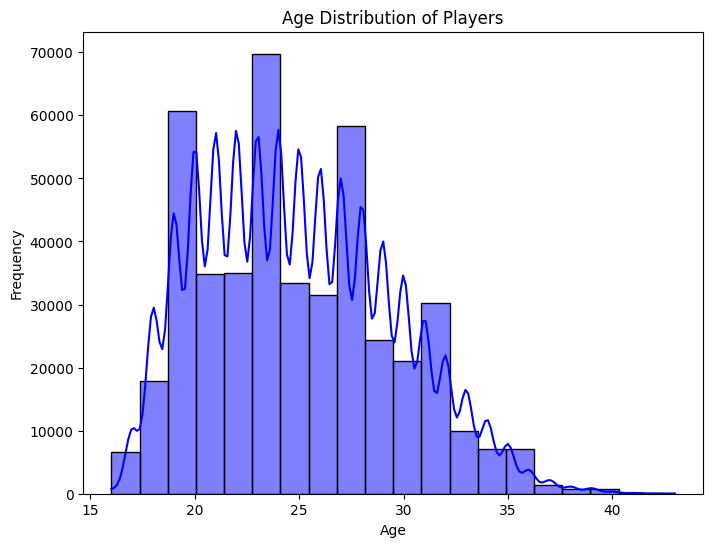

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Age Distribution of Players
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Players")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


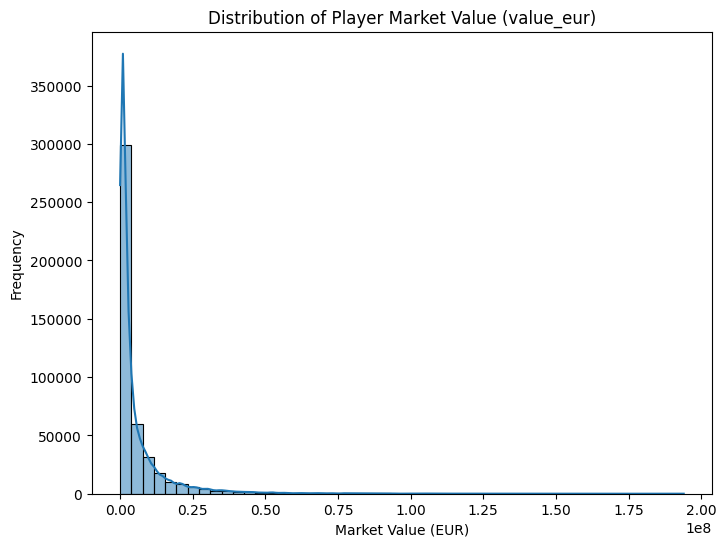

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['value_eur'], bins=50, kde=True)
plt.title("Distribution of Player Market Value (value_eur)")
plt.xlabel("Market Value (EUR)")
plt.ylabel("Frequency")
plt.show()


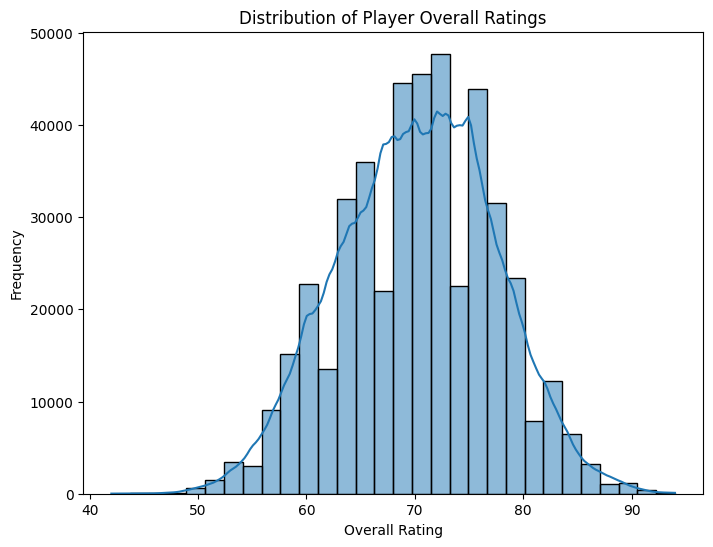

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['overall_x'], bins=30, kde=True)
plt.title("Distribution of Player Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()


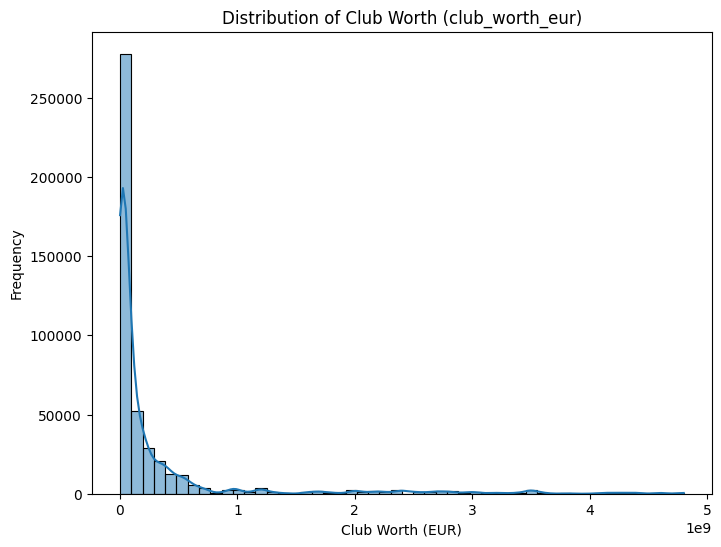

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['club_worth_eur'], bins=50, kde=True)
plt.title("Distribution of Club Worth (club_worth_eur)")
plt.xlabel("Club Worth (EUR)")
plt.ylabel("Frequency")
plt.show()


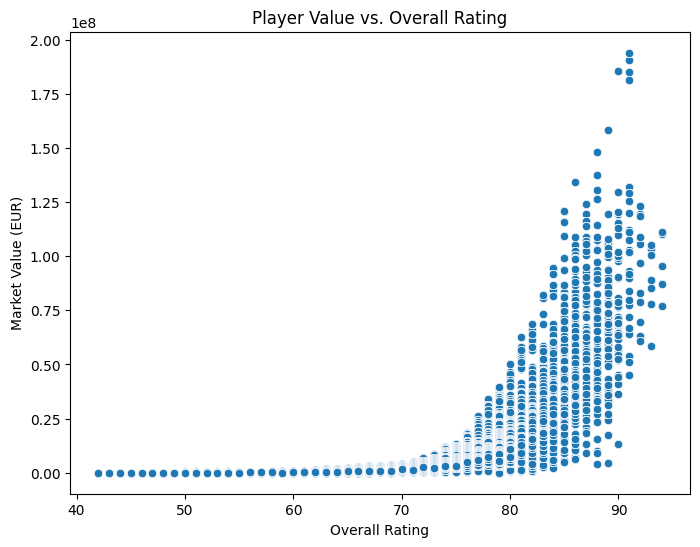

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_data['overall_x'], y=filtered_data['value_eur'])
plt.title("Player Value vs. Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Market Value (EUR)")
plt.show()


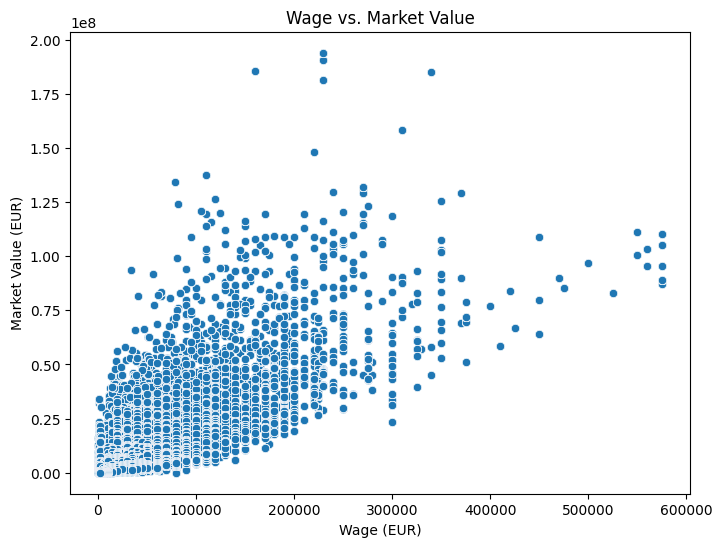

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_data['wage_eur'], y=filtered_data['value_eur'])
plt.title("Wage vs. Market Value")
plt.xlabel("Wage (EUR)")
plt.ylabel("Market Value (EUR)")
plt.show()


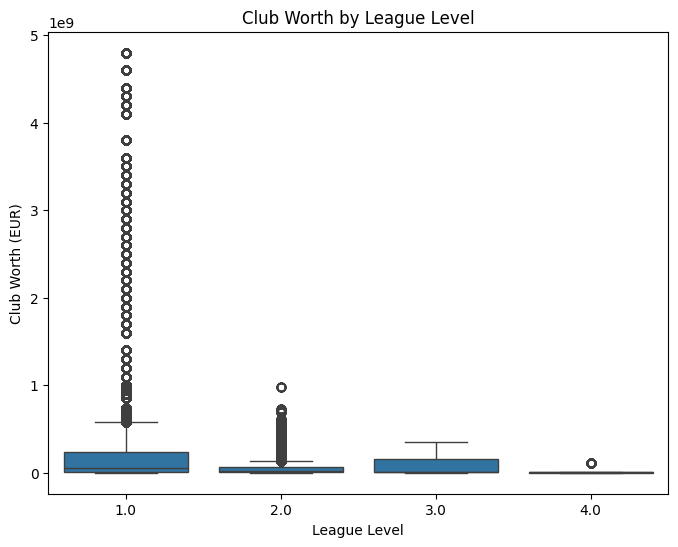

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data['league_level_x'], y=filtered_data['club_worth_eur'])
plt.title("Club Worth by League Level")
plt.xlabel("League Level")
plt.ylabel("Club Worth (EUR)")
plt.show()


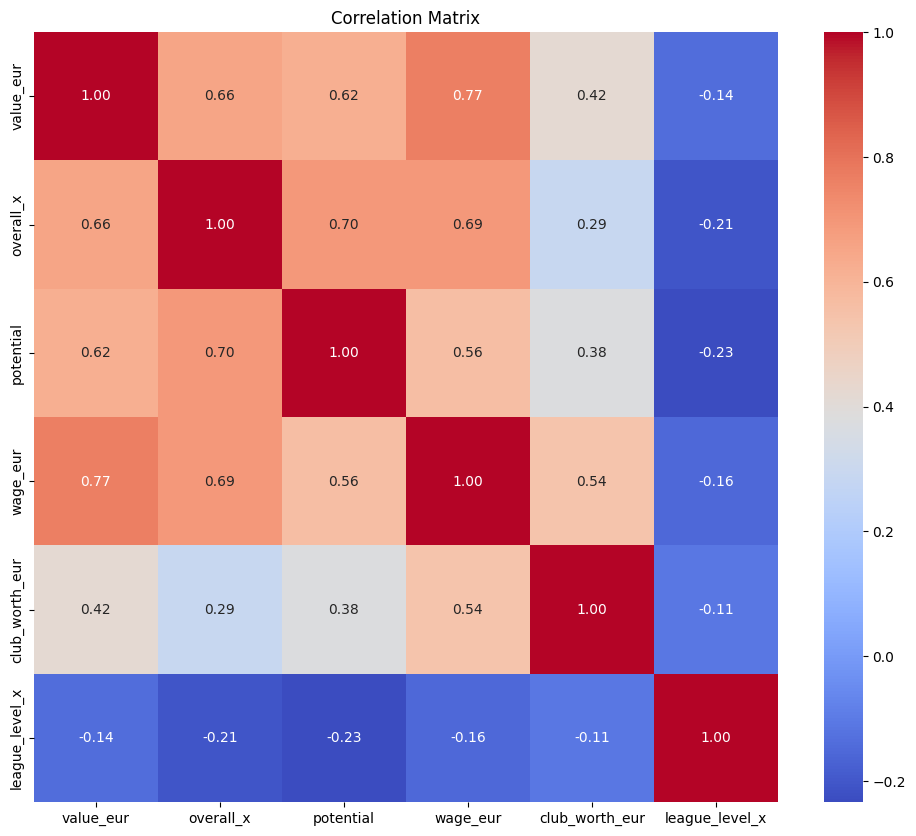

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = filtered_data[['value_eur', 'overall_x', 'potential', 'wage_eur', 'club_worth_eur', 'league_level_x']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


**Features with Highest Correlation to value_eur**

Top 20 Features Most Correlated with 'value_eur':

wage_eur          0.768022
overall_x         0.656945
potential         0.620728
club_worth_eur    0.420177
league_level_x   -0.140374
Name: value_eur, dtype: float64


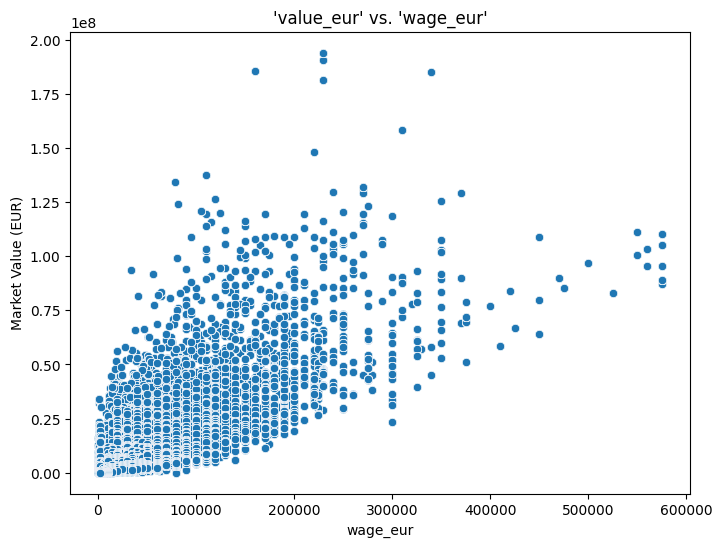

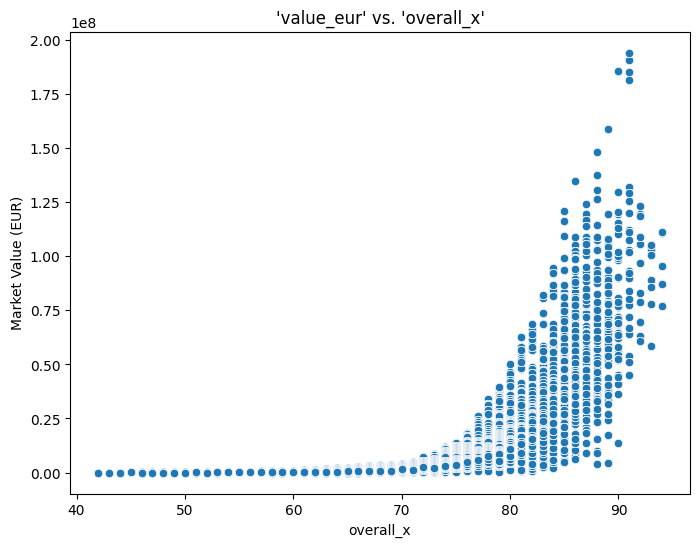

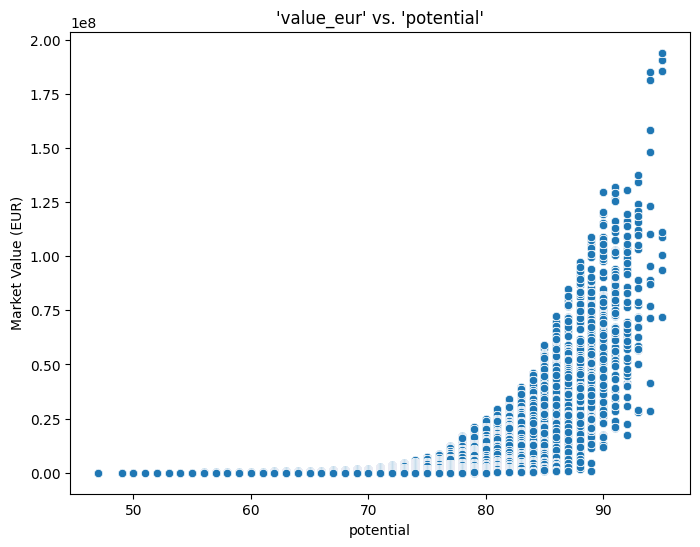

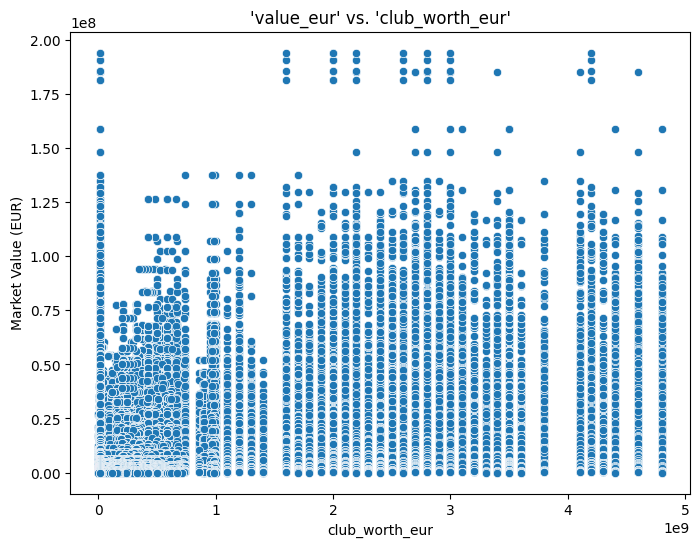

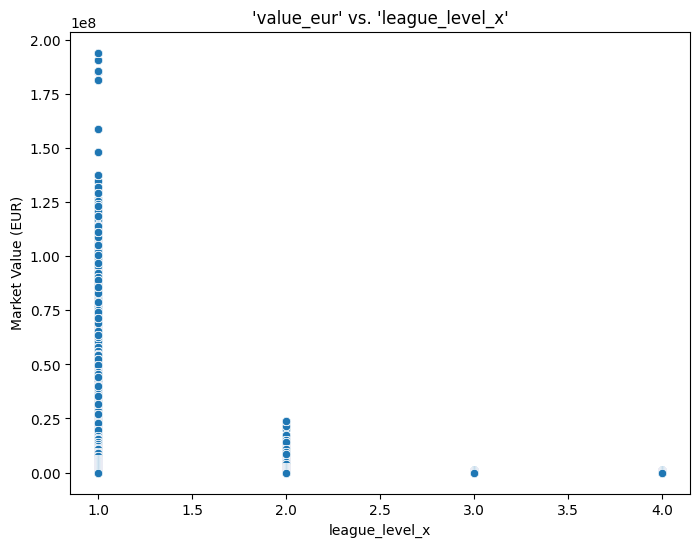

In [ ]:
# Step 4: Get Correlation of All Features with 'value_eur'
value_correlations = corr_matrix['value_eur'].drop('value_eur')  # Exclude self-correlation

# Step 5: Sort Features by Absolute Correlation Value
sorted_correlations = value_correlations.reindex(value_correlations.abs().sort_values(ascending=False).index)

# Step 6: Display Top 20 Features with Highest Correlation to 'value_eur'
top_features = sorted_correlations.head(20)
print("Top 20 Features Most Correlated with 'value_eur':\n")
print(top_features)

# Step 7: Visualize Top Correlated Features
top_feature_names = top_features.index.tolist()

for feature in top_feature_names:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=filtered_data[feature], y=filtered_data['value_eur'])
    plt.title(f"'value_eur' vs. '{feature}'")
    plt.xlabel(feature)
    plt.ylabel('Market Value (EUR)')
    plt.show()



Unique values in 'nationality_name_x':
[ 60 126  15 135  52  22 158 136  64 118  50 180 123 154  84   6 164  41
  91  63 148  28  40  10 174  65   2 114  47  36  77 153  29 150  45  21
  46 177 149 112  81 163  25 110  67 173  86  98  33  59   7  31 132 115
  92 124  49  39  61 106 179  85 141 107 133   4   9  71 161   1  83 187
 185 183 171 139 101 140  53  26  30  72 125 120  78  62  89  17  75  48
  38  74  43 130 181 186  24  87 111  68  88  11 134 156 151  44  32  82
 103  37  20 100 165  55  73 166  80 116 176 113  97 129  42  56  95   3
 108  34 152 104  14 157 168  51   8  90 147 172  99 143 109  18 122 162
 175   0 119  94 167   5 170  96 121 169 160]
Mapping of Encoded Values to Nationalities:
0: Afghanistan
1: Albania
2: Algeria
3: Andorra
4: Angola
5: Antigua and Barbuda
6: Argentina
7: Armenia
8: Aruba
9: Australia
10: Austria
11: Azerbaijan
12: Bahrain
13: Barbados
14: Belarus
15: Belgium
16: Belize
17: Benin
18: Bermuda
19: Bhutan
20: Bolivia
21: Bosnia and Herzegovina
2

<ipython-input-44-860bbd211e6e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['nationality_name_decoded'] = filtered_data['nationality_name_x'].map(nationality_mapping)
<ipython-input-44-860bbd211e6e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


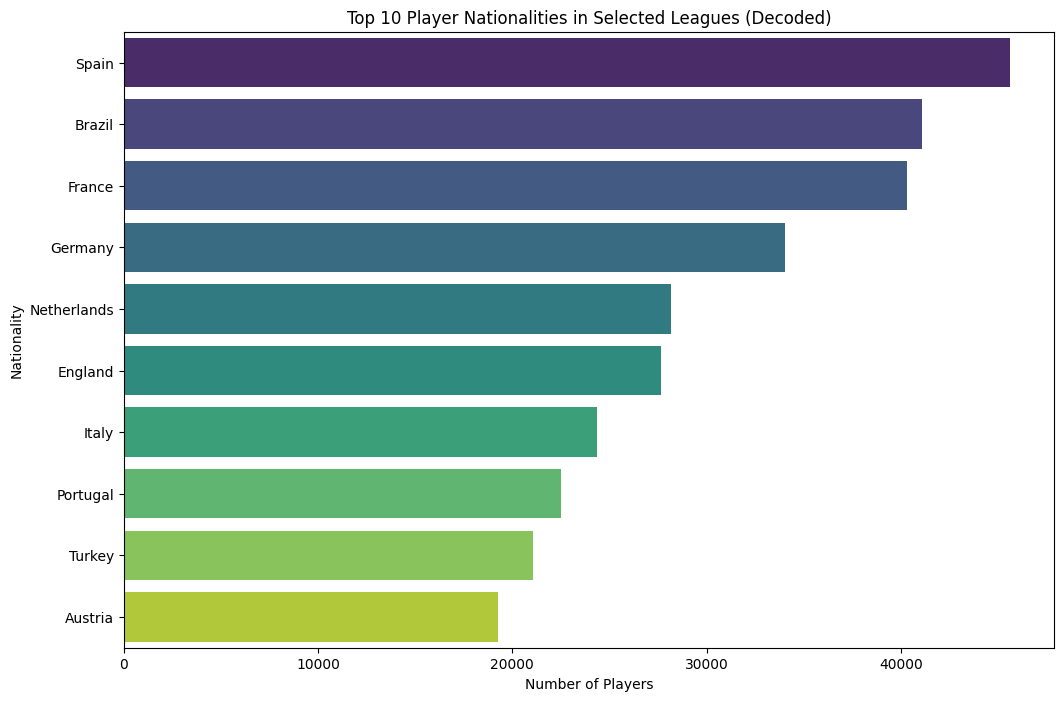

In [ ]:
# Inspect unique values in 'nationality_name_x'
print("Unique values in 'nationality_name_x':")
print(filtered_data['nationality_name_x'].unique())

from sklearn.preprocessing import LabelEncoder

# Re-initialize LabelEncoder and fit on original nationalities
label_encoder = LabelEncoder()
label_encoder.fit(male_players['nationality_name'])
# Retrieve the mapping
nationality_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
print("Mapping of Encoded Values to Nationalities:")
for key, value in nationality_mapping.items():
    print(f"{key}: {value}")

# Decode the 'nationality_name_x' column
filtered_data['nationality_name_decoded'] = filtered_data['nationality_name_x'].map(nationality_mapping)

# Verify the decoded column
print("Decoded Nationality Names:")
print(filtered_data['nationality_name_decoded'].unique())


# Calculate Top 10 Decoded Nationalities
top_nationalities_decoded = filtered_data['nationality_name_decoded'].value_counts().head(10)

# Bar Plot with Decoded Nationality Names
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_nationalities_decoded.values,
    y=top_nationalities_decoded.index,
    palette="viridis"
)
plt.title("Top 10 Player Nationalities in Leagues")
plt.xlabel("Number of Players")
plt.ylabel("Nationality")
plt.show()




<ipython-input-45-8c8c40e50788>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['nationality_name_decoded'] = filtered_data['nationality_name_x'].map(nationality_mapping)
<ipython-input-45-8c8c40e50788>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Decoded Nationalities:
['France' 'Norway' 'Belgium' 'Poland' 'England' 'Brazil' 'Spain'
 'Portugal' 'Germany' 'Netherlands' 'Egypt' 'Uruguay' 'Nigeria' 'Slovenia'
 'Italy' 'Argentina' 'Switzerland' 'Croatia' 'Korea Republic' 'Georgia'
 'Scotland' 'Cameroon' 'Costa Rica' 'Austria' 'Turkey' 'Ghana' 'Algeria'
 'Morocco' 'Denmark' 'Colombia' 'Hungary' 'Slovakia' 'Canada' 'Serbia'
 'Czech Republic' 'Bosnia and Herzegovina' "Côte d'Ivoire" 'Ukraine'
 'Senegal' 'Montenegro' 'Iran' 'Sweden' 'Burkina Faso' 'Mexico' 'Greece'
 'Tunisia' 'Japan' 'Libya' 'Chile' 'Finland' 'Armenia'
 'Central African Republic' 'Paraguay' 'Mozambique' 'Kosovo'
 'North Macedonia' 'Ecuador' 'Congo DR' 'Gabon' 'Mali' 'United States'
 'Jamaica' 'Russia' 'Malta' 'Peru' 'Angola' 'Australia' 'Guinea'
 'Suriname' 'Albania' 'Israel' 'Zimbabwe' 'Wales' 'Venezuela' 'Togo'
 'Republic of Ireland' 'Luxembourg' 'Romania' 'Equatorial Guinea'
 'Burundi' 'Cape Verde Islands' 'Guinea Bissau' 'Northern Ireland'
 'New Zealand' 'Iceland' 

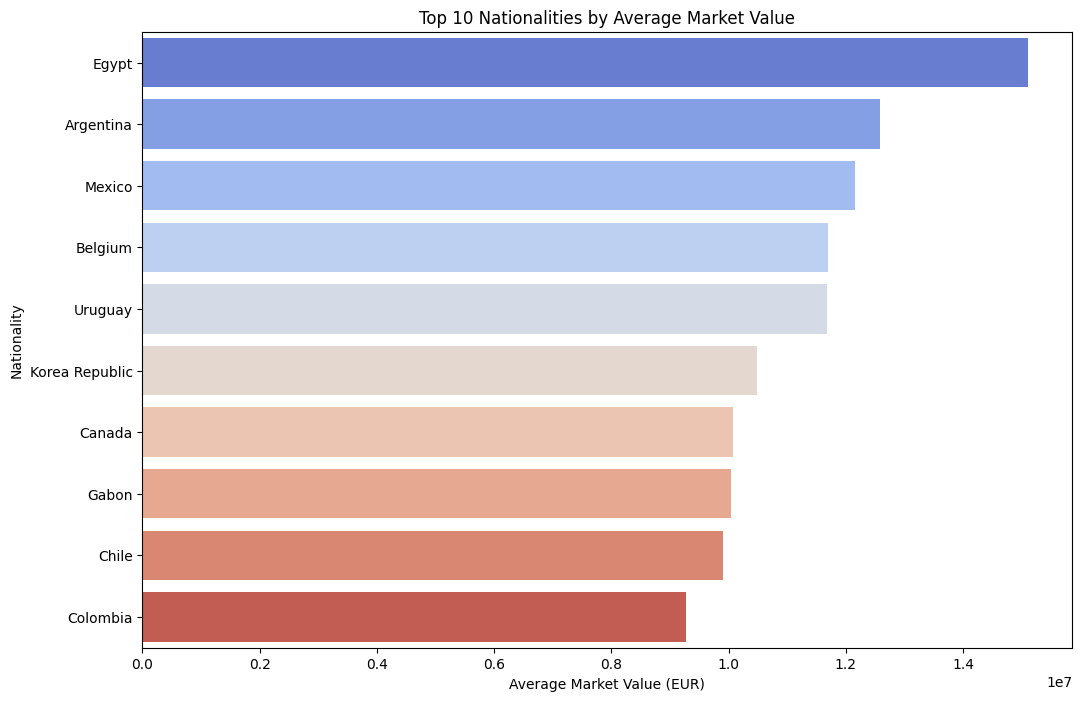

In [ ]:
'''
The output might seem odd because the average market values are influenced by:

Outliers: A few high-value players (e.g., Mohamed Salah for Egypt) can significantly inflate the average.

'''



# Decode 'nationality_name_x' if not already done
filtered_data['nationality_name_decoded'] = filtered_data['nationality_name_x'].map(nationality_mapping)

# Verify decoded values
print("Decoded Nationalities:")
print(filtered_data['nationality_name_decoded'].unique())

# Group by decoded nationality and compute average market value
nationality_market_value = filtered_data.groupby('nationality_name_decoded')['value_eur'].mean().reset_index()

# Sort by market value in descending order
top10_nationalities = nationality_market_value.sort_values(by='value_eur', ascending=False).head(10)

# Display the top 10 nationalities
print("Top 10 Nationalities by Average Market Value:")
print(top10_nationalities)


# Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top10_nationalities,
    x='value_eur',
    y='nationality_name_decoded',
    palette="coolwarm"
)
plt.title("Top 10 Nationalities by Average Market Value")
plt.xlabel("Average Market Value (EUR)")
plt.ylabel("Nationality")
plt.show()


Nationalities with High-Value Players:
   nationality_name_decoded  high_value_count
74                    Spain              9680
29                   France              7246
9                    Brazil              6286
33                  Germany              5222
26                  England              4470
..                      ...               ...
27        Equatorial Guinea                10
49               Luxembourg                10
51                    Malta                10
75                 Suriname                10
84               Uzbekistan                 8

[89 rows x 2 columns]


<ipython-input-46-20f58c7b9885>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


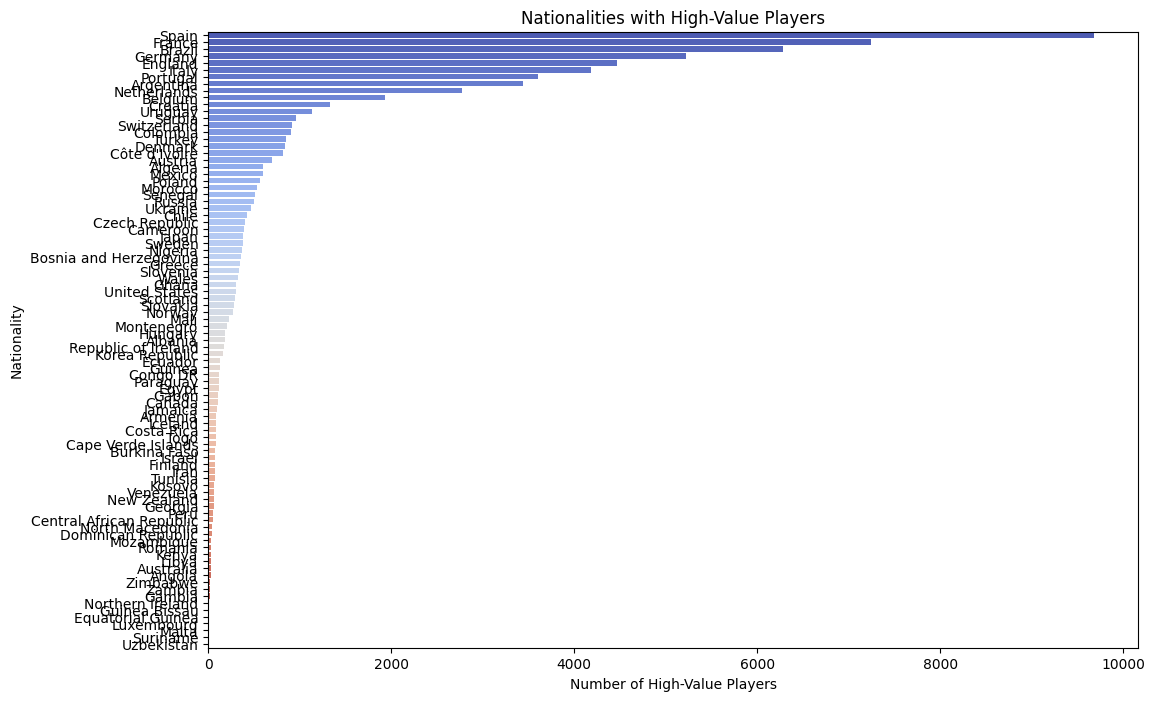

In [ ]:
# Define a high market value threshold
high_value_threshold = 10_000_000

# Filter players with market values above the threshold
high_value_players = filtered_data[filtered_data['value_eur'] > high_value_threshold]

# Group by nationality and count high-value players
high_value_nationalities = high_value_players.groupby('nationality_name_decoded').size().reset_index(name='high_value_count')

# Sort by the number of high-value players
high_value_nationalities = high_value_nationalities.sort_values(by='high_value_count', ascending=False)

# Display results
print("Nationalities with High-Value Players:")
print(high_value_nationalities)

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for high-value nationalities
plt.figure(figsize=(12, 8))
sns.barplot(
    data=high_value_nationalities,
    x='high_value_count',
    y='nationality_name_decoded',
    palette="coolwarm"
)
plt.title("Nationalities with High-Value Players")
plt.xlabel("Number of High-Value Players")
plt.ylabel("Nationality")
plt.show()


Column 'league_name_x_decoded' is missing. Adding it now.
Leagues with Significant Players and Their Nationalities:
    league_name_x_decoded nationality_name_decoded  high_value_count
21             Bundesliga                  Germany              3810
19             Bundesliga                   France               990
49             Bundesliga              Switzerland               540
3              Bundesliga                  Austria               530
46             Bundesliga                    Spain               390
..                    ...                      ...               ...
378             Super Lig                    Italy                10
379             Super Lig           Korea Republic                10
384             Super Lig                   Poland                10
375             Super Lig                    Ghana                 9
391             Super Lig                  Ukraine                 3

[393 rows x 3 columns]


<ipython-input-47-027ed76c0bf9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['league_name_x_decoded'] = filtered_data['league_name_x'].map(league_mapping)
<ipython-input-47-027ed76c0bf9>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


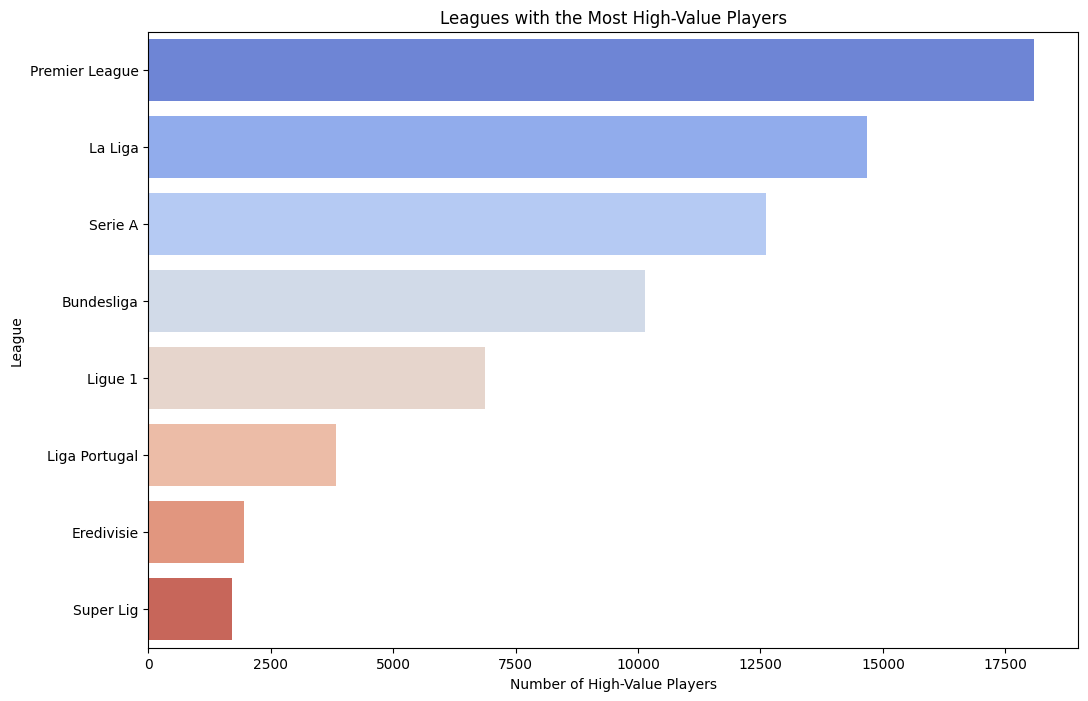

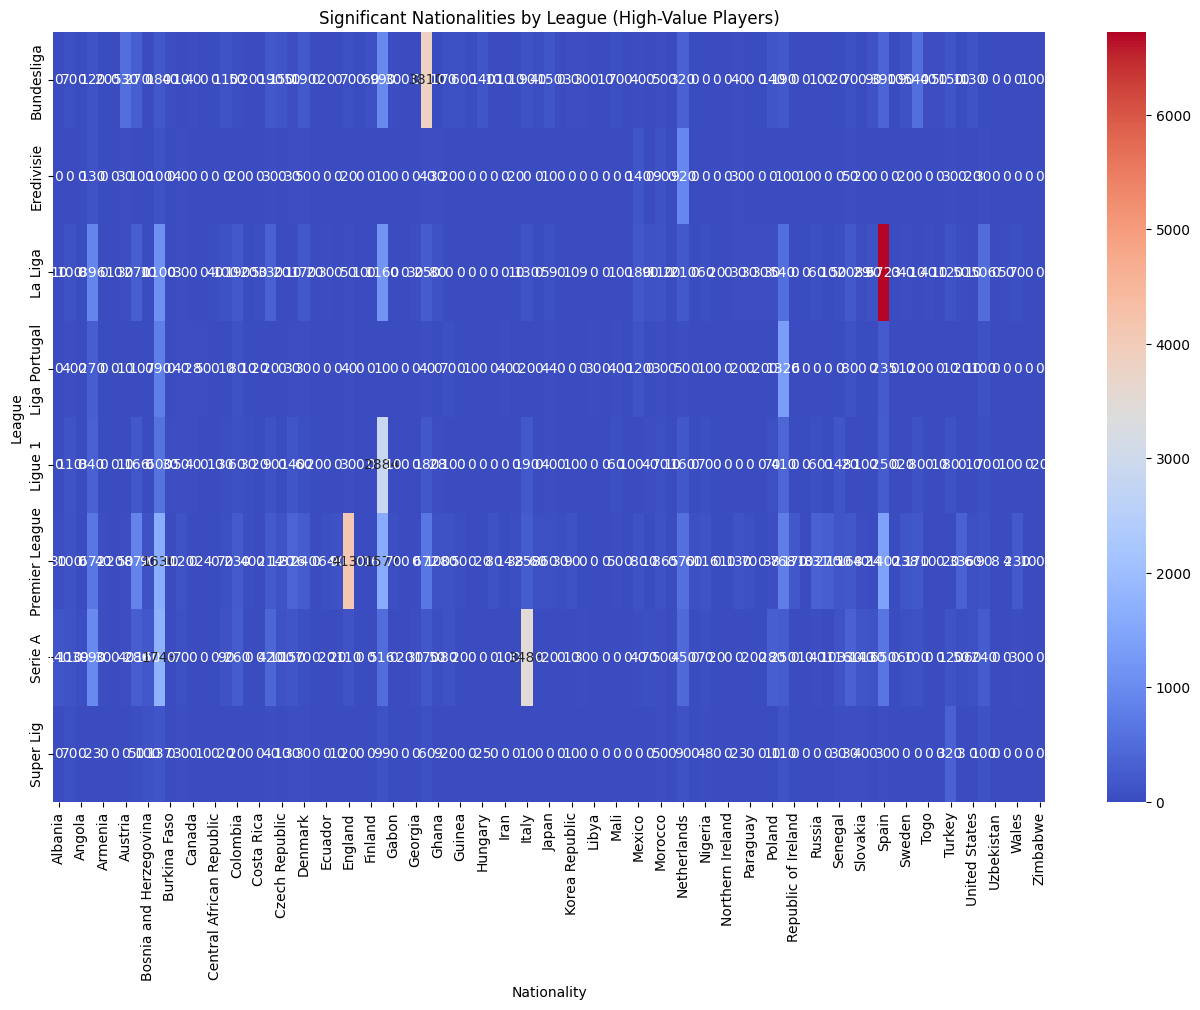

In [ ]:
# Check if 'league_name_x_decoded' exists in filtered_data
if 'league_name_x_decoded' not in filtered_data.columns:
    print("Column 'league_name_x_decoded' is missing. Adding it now.")
else:
    print("Column 'league_name_x_decoded' exists in filtered_data.")


# Define the league mapping
league_mapping = {
    0: '1. Division', 1: '1. HNL', 2: '2. Bundesliga', 3: '3. Liga', 4: 'A-League', 5: 'Allsvenskan',
    6: 'Bundesliga', 7: 'Championship', 8: 'Ekstraklasa', 9: 'Eliteserien', 10: 'Eredivisie',
    11: 'Fortuna Liga', 12: 'J-League', 13: 'Jupiler Pro League', 14: 'K League 1', 15: 'La Liga',
    16: 'La Liga 2', 17: 'League One', 18: 'League Two', 19: 'Liga 1', 20: 'Liga BetPlay',
    21: 'Liga De Futbol Prof', 22: 'Liga MX', 23: 'Liga Portugal', 24: 'Liga Pro',
    25: 'Liga Profesional', 26: 'Ligue 1', 27: 'Ligue 2', 28: 'Major League Soccer',
    29: 'NB I.', 30: 'Premier Division', 31: 'Premier League', 32: 'Premiership',
    33: 'Primera Division', 34: 'Primera División', 35: 'Pro League', 36: 'Serie A',
    37: 'Serie B', 38: 'Super League', 39: 'Super Lig', 40: 'Superliga', 41: 'Veikkausliiga',
    42: 'nan'
}

# Decode league names
filtered_data['league_name_x_decoded'] = filtered_data['league_name_x'].map(league_mapping)


# Check if 'nationality_name_decoded' exists
if 'nationality_name_decoded' not in filtered_data.columns:
    print("Column 'nationality_name_decoded' is missing. Adding it now.")

    # Map nationalities (replace 'nationality_mapping' with your mapping dictionary)
    filtered_data['nationality_name_decoded'] = filtered_data['nationality_name_x'].map(nationality_mapping)


# Filter players with market values above the threshold
high_value_players = filtered_data[filtered_data['value_eur'] > high_value_threshold]

# Group by league and nationality, counting high-value players
significant_leagues_nationalities = high_value_players.groupby(
    ['league_name_x_decoded', 'nationality_name_decoded']
).size().reset_index(name='high_value_count')

# Sort by league and high-value count
significant_leagues_nationalities = significant_leagues_nationalities.sort_values(
    by=['league_name_x_decoded', 'high_value_count'], ascending=[True, False]
)

# Display results
print("Leagues with Significant Players and Their Nationalities:")
print(significant_leagues_nationalities)

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate high-value players by league
league_high_value_counts = high_value_players.groupby('league_name_x_decoded').size().reset_index(name='high_value_count')

# Sort and visualize
league_high_value_counts = league_high_value_counts.sort_values(by='high_value_count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=league_high_value_counts,
    x='high_value_count',
    y='league_name_x_decoded',
    palette="coolwarm"
)
plt.title("Leagues with the Most High-Value Players")
plt.xlabel("Number of High-Value Players")
plt.ylabel("League")
plt.show()


# Pivot data for heatmap
heatmap_data = significant_leagues_nationalities.pivot(
    index='league_name_x_decoded', columns='nationality_name_decoded', values='high_value_count'
).fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", cbar=True)
plt.title("Significant Nationalities by League (High-Value Players)")
plt.xlabel("Nationality")
plt.ylabel("League")
plt.show()



**Data Preparation for Modeling Main**







In [ ]:
from sklearn.model_selection import train_test_split

# Define target variable and features
irrelevant_columns = ['player_url', 'team_url', 'home_stadium', 'short_name',
                      'long_name', 'update_as_of_x', 'update_as_of_y', 'team_name']
target = 'value_eur'

# Remove irrelevant columns
X = filtered_data.drop(columns=irrelevant_columns + [target])
y = filtered_data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert 'dob' to age
current_year = pd.to_datetime('today').year
X_train['age'] = current_year - pd.to_datetime(X_train['dob']).dt.year
X_test['age'] = current_year - pd.to_datetime(X_test['dob']).dt.year

# Convert 'club_joined_date' to tenure
X_train['tenure_years'] = current_year - pd.to_datetime(X_train['club_joined_date']).dt.year
X_test['tenure_years'] = current_year - pd.to_datetime(X_test['club_joined_date']).dt.year

# Drop date columns
X_train = X_train.drop(columns=['dob', 'club_joined_date'])
X_test = X_test.drop(columns=['dob', 'club_joined_date'])

print("Data preparation complete. Remaining columns:")
print(X_train.columns)

# Mapping for non-numeric categorical variables
mappings = {
    'def_defence_defender_line': {'Unknown': 0, 'Cover': 1, 'Offside Trap': 2},
    'off_build_up_play': {'Unknown': 0, 'Balanced': 1, 'Fast Build Up': 2, 'Slow build up': 3},
    'off_chance_creation': {'Unknown': 0, 'Balanced': 1, 'Forward Runs': 2, 'Possession': 3}
}

for col, mapping in mappings.items():
    if col in X_train.columns:
        X_train[col] = X_train[col].map(mapping)
        X_test[col] = X_test[col].map(mapping)

print("Remaining Non-Numeric Columns:")
print(X_train.select_dtypes(include=['object']).columns)

# Handle multi-valued columns
multi_valued_cols = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
                     'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
                     'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for col in multi_valued_cols:
    if col in X_train.columns:
        X_train[col] = X_train[col].str.extract(r'(\d+)', expand=False).astype(float)
        X_test[col] = X_test[col].str.extract(r'(\d+)', expand=False).astype(float)

# Handle player_tags and player_traits
for col in ['player_tags', 'player_traits']:
    if col in X_train.columns:
        tags = X_train[col].str.get_dummies(sep=', ')
        X_train = pd.concat([X_train, tags], axis=1).drop(columns=[col])
        tags_test = X_test[col].str.get_dummies(sep=', ')
        X_test = pd.concat([X_test, tags_test], axis=1).drop(columns=[col])

# Align train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Label encode specific columns
from sklearn.preprocessing import LabelEncoder

for col in ['league_name_x_decoded', 'nationality_name_decoded']:
    le = LabelEncoder()
    if col in X_train.columns:
        X_train[col] = le.fit_transform(X_train[col].fillna('Unknown'))
        X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
        le.classes_ = np.append(le.classes_, 'Unknown')
        X_test[col] = le.transform(X_test[col].fillna('Unknown'))

# One-hot encoding for nominal variables
categorical_columns = ['body_type', 'nation_position', 'league_name_y', 'nationality_name_y']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


Data preparation complete. Remaining columns:
Index(['player_id', 'fifa_version_x', 'fifa_update_x', 'player_positions',
       'overall_x', 'potential', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       ...
       'off_style_Long Ball', 'off_style_Possession', 'off_style_Unknown',
       'build_up_play_positioning_Organised',
       'build_up_play_positioning_Unknown',
       'chance_creation_positioning_Organised',
       'chance_creation_positioning_Unknown', 'nationality_name_decoded',
       'league_name_x_decoded', 'tenure_years'],
      dtype='object', length=186)
Remaining Non-Numeric Columns:
Index(['body_type', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'nation_position',
       'club_loaned_from', 'player_tags', 'player_traits', 'league_name_y',
       'nationality_name_y', 'nationality_name_decoded',
       'league_name_x_decoded

In [ ]:
# Identify numeric columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['float64', 'int64']).columns

print("Numeric Columns:", numeric_columns.tolist())
print("Non-Numeric Columns:", non_numeric_columns.tolist())


from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale only numeric columns
X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled_numeric = scaler.transform(X_test[numeric_columns])

# Convert scaled data back to DataFrame
X_train_scaled_numeric = pd.DataFrame(X_train_scaled_numeric, columns=numeric_columns, index=X_train.index)
X_test_scaled_numeric = pd.DataFrame(X_test_scaled_numeric, columns=numeric_columns, index=X_test.index)

# Combine numeric and non-numeric columns
X_train_combined = pd.concat([X_train_scaled_numeric, X_train[non_numeric_columns]], axis=1)
X_test_combined = pd.concat([X_test_scaled_numeric, X_test[non_numeric_columns]], axis=1)

# Verify combined dataset
print("Combined Training Data:")
print(X_train_combined.head())

Numeric Columns: ['fifa_version_x', 'fifa_update_x', 'wage_eur', 'club_team_id', 'league_id_x', 'league_level_x', 'pace', 'shooting', 'passing', 'dribbling', 'physic', 'mentality_composure', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'nation_jersey_number', 'nation_team_id', 'goalkeeping_speed', 'release_clause_eur', 'club_contract_valid_until_year', 'club_jersey_number', 'league_level_y', 'domestic_prestige', 'transfer_budget_eur', 'club_worth_eur', 'starting_xi_average_age', 'whole_team_average_age', 'captain', 'short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner', 'def_team_width', 'def_team_depth', 'def_defence_pressure', 'def_defence_aggression', 'def_defence_width', 'off_build_up_play', 'off_chance_creation', 'off_team_width', 'off_players_in_box', 'off_corners', 'off_free_kick

In [ ]:
# Check for non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns found: {non_numeric_cols}")
    # Convert or drop non-numeric columns here


Non-numeric columns found: Index(['club_loaned_from'], dtype='object')


******************************************************

**Data Preparation for Modeling**

Split Data into Training and Testing Sets


In [ ]:
X_train = X_train.drop(columns=['club_loaned_from'])
X_test = X_test.drop(columns=['club_loaned_from'])

print("Remaining Non-Numeric Columns:")
print(X_train.select_dtypes(include=['object', 'category']).columns)


Remaining Non-Numeric Columns:
Index([], dtype='object')


**Low-Variance Feature Removal**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold for variance
selector = VarianceThreshold(threshold=0.01)

# Fit the selector to the training data
selector.fit(X_train)

# Get features to keep and remove
selected_features = X_train.columns[selector.get_support()]
removed_features = X_train.columns[~selector.get_support()]

# Transform the datasets
X_train_var = selector.transform(X_train)
X_test_var = selector.transform(X_test)

# Update the datasets with retained features
X_train = pd.DataFrame(X_train_var, columns=selected_features)
X_test = pd.DataFrame(X_test_var, columns=selected_features)

# Log the results
print(f"Features after low-variance removal: {X_train.shape[1]}")
print(f"Removed features due to low variance: {len(removed_features)}")
print("\nRemoved Features:")
print(removed_features.tolist())



Features after low-variance removal: 228
Removed features due to low variance: 128

Removed Features:
['fifa_update_x', 'fifa_update_y', 'off_corners', 'off_free_kicks', 'work_rate_Low/Low', 'off_style_Fast Build Up', '#Aerial Threat', '#Aerial threat', '#Clinical Finisher', '#Clinical finisher', '#Complete Defender', '#Complete Forward', '#Complete Midfielder', '#Complete defender', '#Complete forward', '#Complete midfielder', '#Crosser', '#Distance Shooter', '#Distance shooter', '#FK Specialist', '#Playmaker', '#Playmaker\xa0', '#Poacher', '#Tackling', '#Tackling\xa0', '#Tactician', '#Tactician\xa0', '1-on-1 Rush', 'Acrobatic', 'Acrobatic +', 'Aerial', 'Aerial +', 'Anticipate', 'Anticipate +', 'Backs Into Player', 'Block', 'Block +', 'Bruiser', 'Bruiser +', 'Cautious With Crosses', 'Chip Shot', 'Chip Shot (AI)', 'Chip Shot +', 'Dead Ball', 'Dead Ball +', 'Diver', 'Far Throw', 'Finesse Shot +', 'First Touch', 'First Touch +', 'Flair +', 'Footwork', 'GK Up for Corners', 'Giant Throw-in

**Correlation Analysis**

In [ ]:
import numpy as np
import pandas as pd

# Compute the correlation matrix
correlation_matrix = X_train.corr().abs()

# Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with high correlation (> 0.9)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
X_train = X_train.drop(columns=high_corr_features)
X_test = X_test.drop(columns=high_corr_features)

# Log results
print(f"Features after correlation analysis: {X_train.shape[1]}")
print(f"Removed features due to high correlation: {len(high_corr_features)}")

# Display removed and retained features
print("\nRemoved Features (High Correlation):")
print(high_corr_features)

print("\nRetained Features:")
print(X_train.columns.tolist())



Features after correlation analysis: 162
Removed features due to high correlation: 66

Removed Features (High Correlation):
['attacking_volleys', 'skill_long_passing', 'skill_ball_control', 'movement_sprint_speed', 'mentality_interceptions', 'mentality_positioning', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'goalkeeping_speed', 'club_contract_valid_until_year', 'team_id', 'attack', 'midfield', 'defence', 'left_short_free_kick', 'right_short_free_kick', 'def_team_depth', 'off_chance_creation', 'off_team_width', 'current_year', 'attacking', 'movement', 'team_avg_overall', 'overall_percentile_in_position', 'potential_percentile_in_position', 'build_up_play_positioning_Organised', 'bu

**Univariate Statistical Tests**




In [ ]:
# Drop columns with more than a threshold of missing values (e.g., 50%)
threshold = 0.5
missing_fraction = X_train.isnull().mean()
columns_to_drop = missing_fraction[missing_fraction > threshold].index
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Ensure no NaN values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Apply SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

# Set the number of features to select
k = 40  # You can adjust this number (e.g., 30, 40)
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_train, y_train)

# Retained and removed features
selected_features = X_train.columns[selector.get_support()]
removed_features = X_train.columns[~selector.get_support()]

# Update datasets
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Log results
print(f"Features retained by SelectKBest ({len(selected_features)}):")
print(selected_features.tolist())
print(f"\nFeatures removed by SelectKBest ({len(removed_features)}):")
print(removed_features.tolist())





Features retained by SelectKBest (40):
['overall_x', 'potential', 'wage_eur', 'skill_moves', 'international_reputation', 'pace', 'shooting', 'passing', 'dribbling', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'movement_acceleration', 'movement_agility', 'movement_reactions', 'power_shot_power', 'power_stamina', 'power_long_shots', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'lwb', 'release_clause_eur', 'overall_y', 'international_prestige', 'domestic_prestige', 'transfer_budget_eur', 'club_worth_eur', 'power', 'normalized_value', 'real_face_Yes', '#Acrobat', '#Dribbler', 'Flair', 'Outside Foot Shot', 'body_type_Unique']

Features removed by SelectKBest (0):
[]


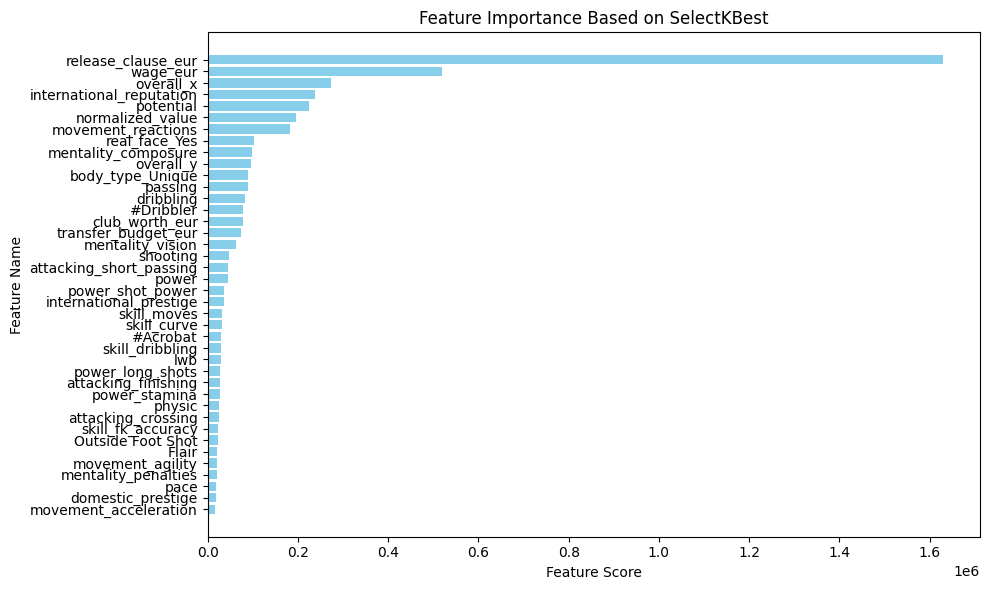

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature scores from the selector
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Score'], color='skyblue')
plt.xlabel('Feature Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance Based on SelectKBest')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.tight_layout()
plt.show()
